Most of the collections of random variables we have seen so far involve independent random variables. In many real life situations, we need to analyze data that are clearly dependent. One common example of this is stock market data. The _change_ in the price of a stock over one day may be assumed to be independent of the stock price at the beginning of the day, but the price at the end of they day is not.

A simple model used to study behaviour of such data is a _random walk_. Given independent _increments_ (changes) $X_1, X_2, \dotsc, X_n$, we construct

\begin{eqnarray*}
S_1 &=& X_1 \\
S_2 &=& S_1 + X_2 = X_1 + X_2 \\
S_3 &=& S_2 + X_3 = X_1 + X_2 + X_3 \\
&\vdots& \\
S_n & = & S_{n-1} + X_n = X_1 + \dotsm + X_n
\end{eqnarray*}

If $X_i \sim N(0, 1)$ independently, we can simulate such a process as follows.

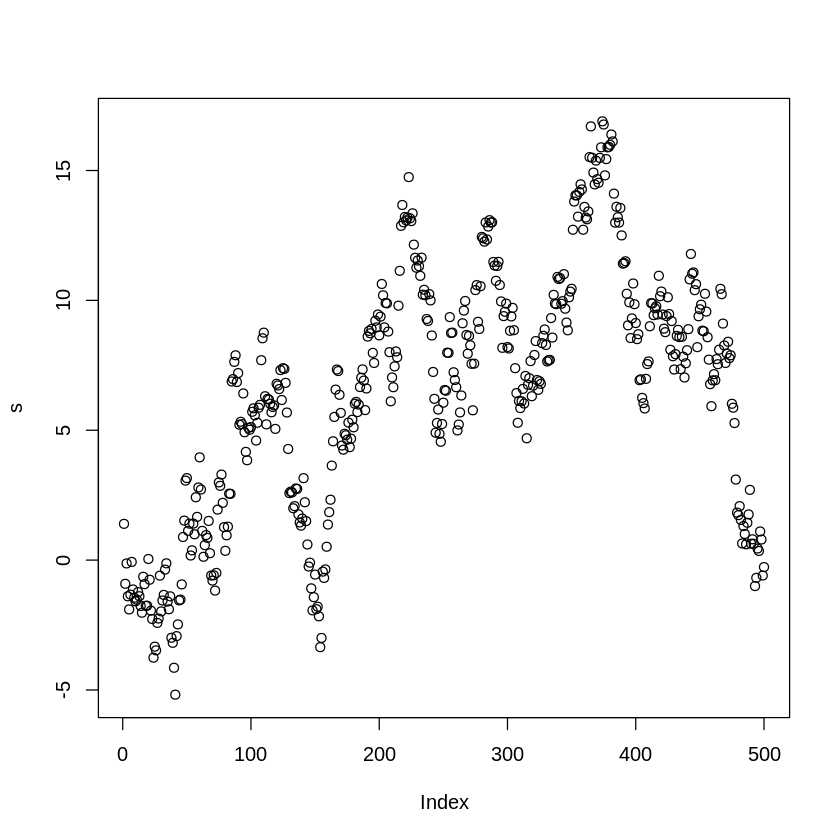

In [12]:
n <- 500
x <- rnorm(n)
s <- cumsum(x)
plot(s)

In important but difficult question is the following: How long will the random walk need to run until it reaches a threshold? As a specific instance of this problem, consider the threshold $a = 10$. Suppose we want to find, for $n = 500$,
$$
p = P(\max_{1 \leq i \leq n} S_i > a)
$$
We can estimate $p$ by repeating the above simulation many times.

In [13]:
rw_exceeds <- function(n, a) {
    s <- cumsum(rnorm(n))
    if (max(s) > a) TRUE else FALSE
}
replicate(1000, rw_exceeds(n = 500, a = 10)) |> mean()

[1] 0.62

A more difficult and interesting problem is to study the distribution of the first _time_ when this happens. Suppose we do not stop at $n = 500$, instead continuing for ever. Define
$$
T = \min \{ i : S_i > a \}
$$
It is possible that $S_i > a$ never happens (e.g., if $a > 0$ and all $X_i < 0$. In that case, define $T = \infty$. What is the distribution of $T$? What is $E(T)$? What is $Var(T)$?

Simulating the random walk for a fixed $n$ can give us partial information about the distribution of $T$.

In [14]:
time_first_exceeds <- function(n, a) {
    s <- cumsum(rnorm(n))
    w <- which(s > a)
    if (length(w) > 0) w[1] else 2*n
}
t1 <- replicate(1000, time_first_exceeds(500, a = 10))

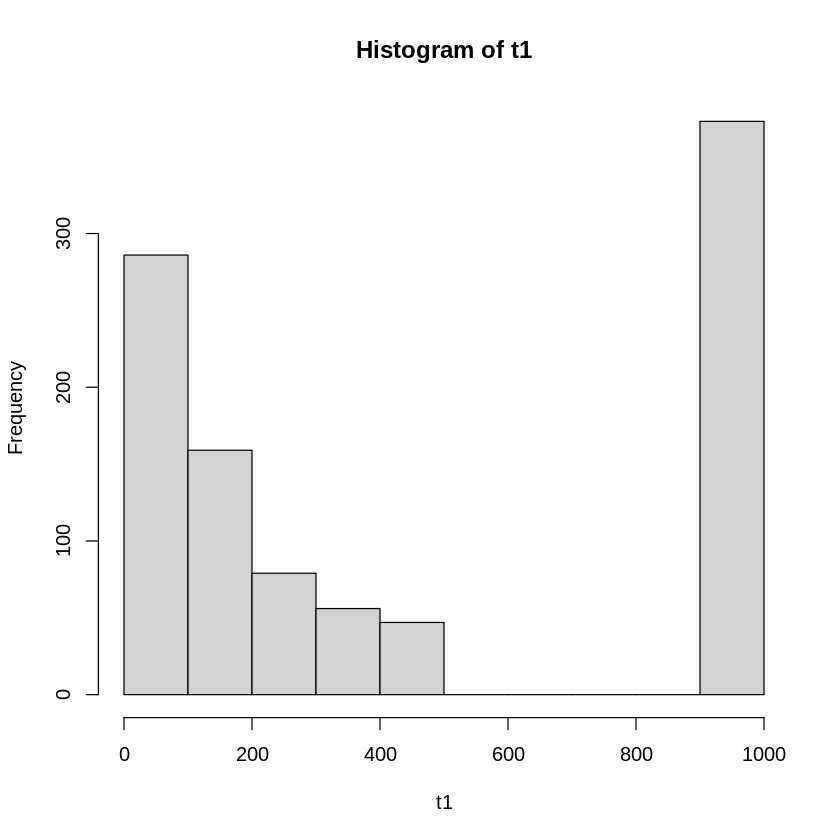

In [15]:
hist(t1)

The following gives us the proportion of simulation in which the threshold was not reached.

In [16]:
sum(t1 == 1000) / length(t1)

[1] 0.373

If we increase the value of `n` to 5000, we get

In [17]:
t2 <- replicate(1000, time_first_exceeds(5000, a = 10))
sum(t2 == 10000) / length(t2)

[1] 0.137

Clearly, simulating the random walk longer makes it more likely that the threshold will be reached. However, this comes at a cost. For the cases where the threshold has already been reached well before `n = 5000` jumps, we are simulating many additional random variables unnecessarily.

An alternative is to simulate the $X_i$-s one at a time, and check after each step. This could be done as follows.

In [18]:
time_first_exceeds_v2 <- function(n, a) {
    s <- 0
    i <- 0
    while (s < a & i < n) {
      s <- s + rnorm(1)
      i <- i + 1
    }
    if (i < n) i else 2*n
}

In [19]:
t3 <- replicate(1000, time_first_exceeds_v2(5000, a = 10))
sum(t3 == 10000) / length(t3)

[1] 0.122

The problem with this approach is that it does not use vectorization, so even though it does not perform unnecessary simulation, the ultimate result may be much slower. The speed of the two implementations can be compared using the following calls.

In [20]:
system.time(replicate(5000, time_first_exceeds(10000, a = 10)))

   user  system elapsed 
  4.683   0.019   4.787 

In [21]:
system.time(replicate(5000, time_first_exceeds_v2(10000, a = 10)))

   user  system elapsed 
 11.902   0.007  11.988 

# Your assignment

Your task is to write another function to perform this same task, but in a way that strikes a balance between the two extemes shown above.

Implement your solution as the function `time_first_exceeds_3` in the cell below.

In [ ]:
time_first_exceeds_v3 <- function(n, a) {
    ## your solution here
}

Once you are satisfied with your solution, you may test the performance of your method with the following test code.

In [ ]:
system.time(replicate(5000, time_first_exceeds_v3(10000, a = 10)))

Ideally, your function should take less time that both of the versions shown above.

When you are ready to submit your solution, download the notebook as an `.ipynb` file, and submit following instructions.

You will be graded on both the correctness and efficiency of your implementation.